In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [2]:
# I have loaded the Titanic dataset from a CSV file.
data = pd.read_csv('/content/train.csv')

In [3]:
# I have handled missing values in the dataset to ensure all features are complete.
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
data['Fare'] = imputer.fit_transform(data[['Fare']])
data['Embarked'].fillna('S', inplace=True)

<ipython-input-3-5dcfb378549e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna('S', inplace=True)


In [4]:
# I have encoded the categorical variables ('Sex' and 'Embarked') into numeric values using LabelEncoder.
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

In [5]:
# I have prepared the features (X) and target (y) for model training.
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

In [6]:
# I have split the dataset into training and validation sets to evaluate the model's performance.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# I have converted the datasets into DMatrix format, which is optimized for XGBoost computations.
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [8]:
# I have trained an XGBoost model using the processed data.
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'max_depth': 6,
    'eta': 0.1
}
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'validation')], early_stopping_rounds=10)


[0]	validation-logloss:0.63257
[1]	validation-logloss:0.59429
[2]	validation-logloss:0.56286
[3]	validation-logloss:0.53817
[4]	validation-logloss:0.51816
[5]	validation-logloss:0.50298
[6]	validation-logloss:0.48699
[7]	validation-logloss:0.47502
[8]	validation-logloss:0.46505
[9]	validation-logloss:0.45706
[10]	validation-logloss:0.45123
[11]	validation-logloss:0.44490
[12]	validation-logloss:0.43851
[13]	validation-logloss:0.43563
[14]	validation-logloss:0.43106
[15]	validation-logloss:0.42816
[16]	validation-logloss:0.42655
[17]	validation-logloss:0.42352
[18]	validation-logloss:0.42099
[19]	validation-logloss:0.42116
[20]	validation-logloss:0.41960
[21]	validation-logloss:0.41913
[22]	validation-logloss:0.41763
[23]	validation-logloss:0.41772
[24]	validation-logloss:0.41870
[25]	validation-logloss:0.41793
[26]	validation-logloss:0.41642
[27]	validation-logloss:0.41707
[28]	validation-logloss:0.41777
[29]	validation-logloss:0.41718
[30]	validation-logloss:0.41711
[31]	validation-lo

<Figure size 1000x600 with 0 Axes>

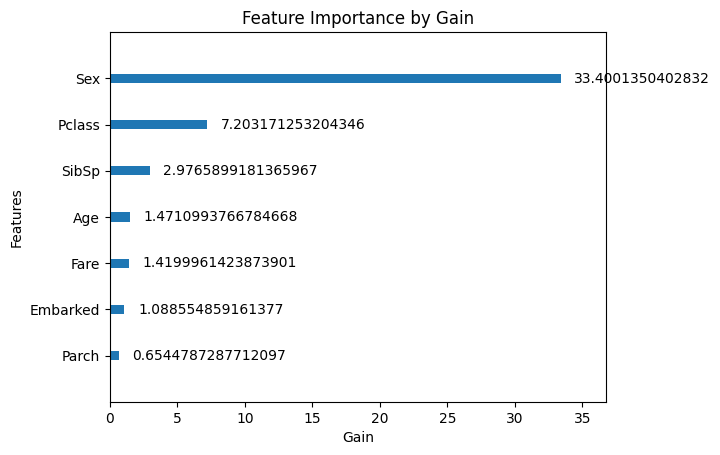

In [9]:
# I have visualized the feature importance to understand which features contribute most to the model's predictions.
# The 'gain' metric measures the contribution of each feature to the splits in the trees.
plt.figure(figsize=(10, 6))
xgb.plot_importance(bst, importance_type='gain', grid=False)
plt.title("Feature Importance by Gain")
plt.xlabel("Gain")
plt.ylabel("Features")
plt.show()

<Figure size 1000x600 with 0 Axes>

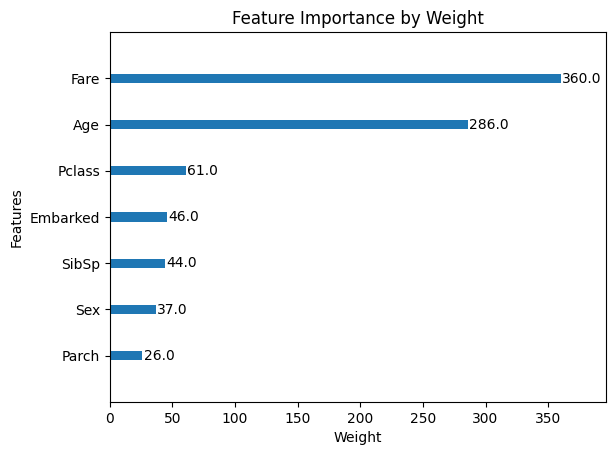

In [10]:
# I have also visualized the feature importance using the 'weight' metric.
# The 'weight' metric counts the number of times each feature is used to split the data across all trees.
plt.figure(figsize=(10, 6))
xgb.plot_importance(bst, importance_type='weight', grid=False)
plt.title("Feature Importance by Weight")
plt.xlabel("Weight")
plt.ylabel("Features")
plt.show()

In [11]:
# I have printed the feature importance scores to provide numerical insights into their contributions.
importance = bst.get_score(importance_type='gain')
print("\nFeature Importance Scores (by Gain):")
for feature, score in sorted(importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {score:.2f}")


Feature Importance Scores (by Gain):
Sex: 33.40
Pclass: 7.20
SibSp: 2.98
Age: 1.47
Fare: 1.42
Embarked: 1.09
Parch: 0.65
